In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

In [3]:
def wrapped_gaussian(theta, mu, sigma):
    # Number of wrapping terms to include
    k = np.arange(-3, 4)
    
    # Calculate wrapped gaussian
    f = np.zeros_like(theta)
    for ki in k:
        f += np.exp(-(theta - mu + 2*np.pi*ki)**2 / (2*sigma**2))
    
    # Normalize
    f = f / (sigma * np.sqrt(2*np.pi))
    
    return f


In [4]:
def bimodal_gaussian(x,eta,Q):
    sigma = np.sqrt(-1/2 * np.log(Q))
    print(np.abs(1-2*eta)*Q**(1/4))
    f1 = wrapped_gaussian(x, 0, sigma)
    f2 = wrapped_gaussian(x, np.pi, sigma)
    f = eta*f1 + (1-eta)*f2
    return f

In [5]:
def bimodal_gaussian_dist(N, eta, Q, seed=None):
    # 분포 생성을 위한 x 범위 설정
    x = np.linspace(-np.pi/2, 3*np.pi/2, 100000)
    
    # 확률밀도함수 계산
    sigma = np.sqrt(-1/2 * np.log(Q))
    f1 = wrapped_gaussian(x, 0, sigma)
    f2 = wrapped_gaussian(x, np.pi, sigma)
    pdf = eta*f1 + (1-eta)*f2
    
    # CDF 계산 및 정규화
    cdf = np.cumsum(pdf)
    cdf = cdf/cdf[-1]
    
    # 균일 분포에서 샘플링
    if seed is not None:
        np.random.seed(seed)
        u1 = np.random.uniform(0, 0.5, N//2)
        u2 = 0.5 + u1
        u = np.r_[u1,u2]
    else:
        u = (np.arange(N+1)[:-1] + 1)/(N+1)
        
    # CDF의 역함수를 이용해 분포 생성
    idx = np.searchsorted(cdf, u)
    theta = x[idx]
    
    return theta

In [ ]:
args = ()
@jit(nopython=True)
def myFun4(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    r = np.abs(r)
    dr = 1/(2 * r)* (1-r**4)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/(2*r**2) * (1+r**4)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =   dpsi2 - dpsi1
    return np.array([dr,dphi])


def myFun5(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    r = np.abs(r)
    dr = 1/(2 * abs(r))* (1-abs(r)**4)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/(2*abs(r**2)) * (1+r**4)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

In [6]:
np.random.seed(1)
u1 = np.random.uniform(0, 0.5, 500)
u2 = 0.5 + u1
u = np.r_[u1,u2]

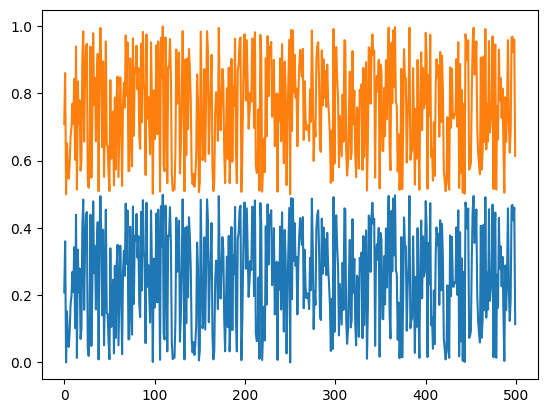

In [7]:
plt.plot(u1)
plt.plot(u2)

0.017602234735867882


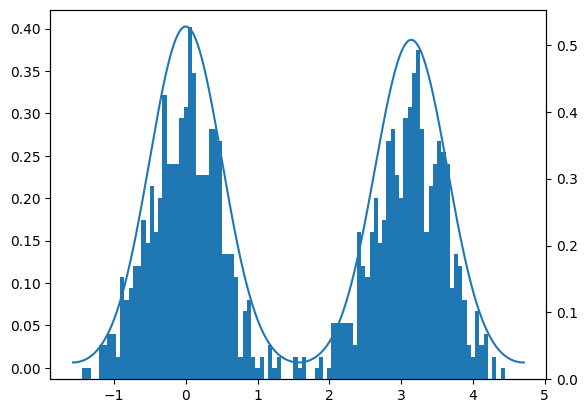

In [10]:
x = np.linspace(-np.pi/2,3*np.pi/2,10000)
f = bimodal_gaussian(x,0.51,0.6)
theta_init = bimodal_gaussian_dist(1000,0.51,0.6,seed=10)
plt.plot(x,f)
plt.twinx()
plt.hist(theta_init,bins=100,density=True)
plt.show()

In [70]:
np.abs(np.mean(np.exp(2j*theta_init)))
print(np.abs(np.mean(np.exp(1j*theta_init))))

0.017648678977936393


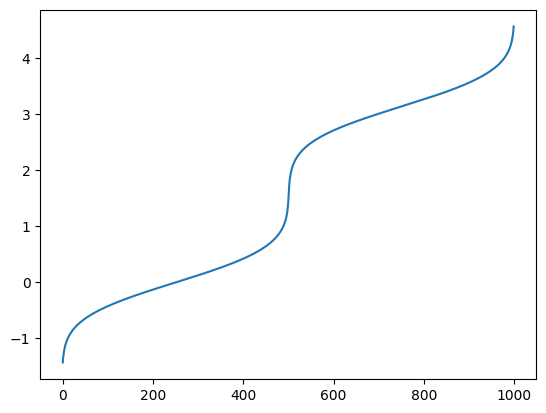

In [64]:
plt.plot(theta_init)

In [11]:
from Simul import get_RQ_MOA4,get_RQ_MOA5,get_RQ_MOA2,get_R_simul_wfT,get_RQ_MOA6,get_Q2,get_Q3,get_R_simul_wfT_gaussian

In [12]:
alpha = 1
beta = 0.6
eta1 = 0.1
eta2 = 0.0
Q_init = 0.6
t_end = 5000

$\eta_b = \frac{1 +\eta_a}{2} $
$2\eta_b - 1 = \eta_a $

In [20]:
N = 10000
R1_s,R2_s,Q1_s,Q2_s,t,thetas = get_R_simul_wfT_gaussian(1.,Q_init,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=0,t_end=t_end,dt=0.1,seed=1)

In [24]:
R1_s_reg,R2_s_reg,Q1_s_reg,Q2_s_reg,t,thetas_reg = get_R_simul_wfT(1.,Q_init,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=0,t_end=t_end,dt=0.1,seed=None)

In [25]:
phi_s = (np.angle(Q2_s) - np.angle(Q1_s))%(2*np.pi)
Q_s = np.abs(Q2_s)

phi_s_reg = (np.angle(Q2_s_reg) - np.angle(Q1_s_reg))%(2*np.pi)
Q_s_reg = np.abs(Q2_s_reg)


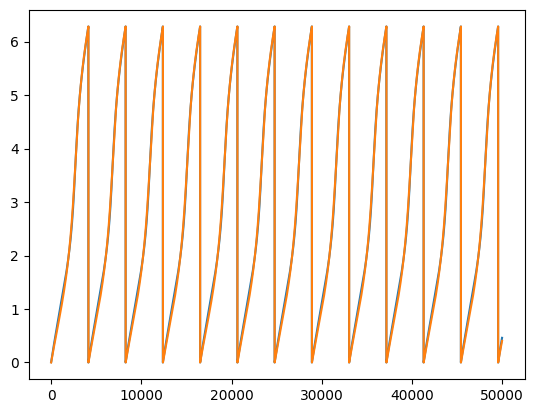

In [26]:
plt.plot(phi_s%(2*np.pi))
plt.plot(phi_s_reg%(2*np.pi))

(array([ 26.,  26.,  28.,  29.,  32.,  35.,  38.,  42.,  48.,  55.,  63.,
         75.,  91., 111., 139., 179., 232., 302., 376., 436., 436., 385.,
        310., 241., 182., 144., 113.,  92.,  76.,  65.,  56.,  48.,  43.,
         39.,  35.,  32.,  30.,  28.,  26.,  25.,  24.,  24.,  23.,  22.,
         23.,  22.,  23.,  23.,  23.,  24.,  25.,  26.,  28.,  29.,  32.,
         35.,  38.,  42.,  48.,  54.,  63.,  75.,  89., 110., 138., 177.,
        229., 298., 376., 434., 437., 387., 315., 240., 186., 144., 116.,
         92.,  78.,  65.,  55.,  49.,  43.,  39.,  35.,  32.,  30.,  28.,
         26.,  26.,  24.,  23.,  23.,  23.,  22.,  23.,  22.,  23.,  23.,
         25.]),
 array([-5.42968182, -5.36690121, -5.30412059, -5.24133997, -5.17855936,
        -5.11577874, -5.05299812, -4.99021751, -4.92743689, -4.86465627,
        -4.80187566, -4.73909504, -4.67631442, -4.6135338 , -4.55075319,
        -4.48797257, -4.42519195, -4.36241134, -4.29963072, -4.2368501 ,
        -4.17406949, -4.11

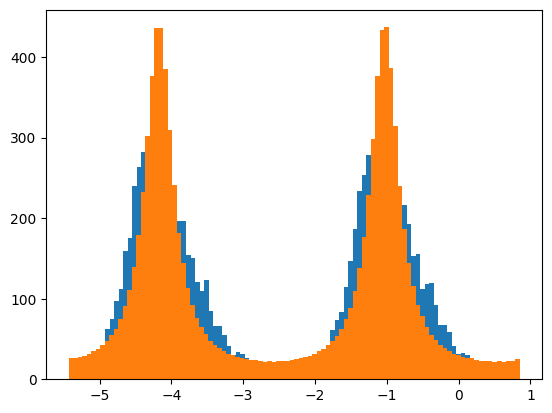

In [29]:
plt.hist(thetas[-1][N:],bins=100)
plt.hist(thetas_reg[-1][N:],bins=100)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

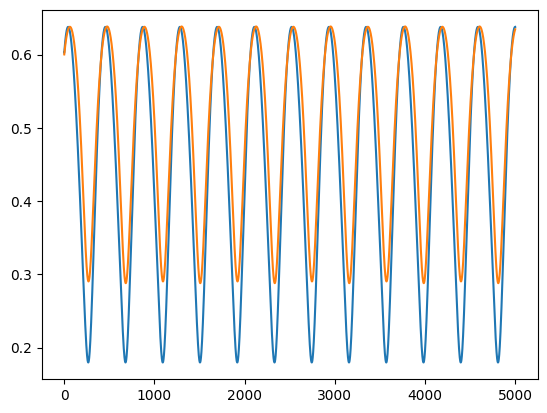

In [30]:
plt.plot(t,np.abs(Q2_s))
plt.plot(t,Q_s_reg)
plt.plot(t,u[:,0]**2)
plt.twinx()
# plt.plot(eta2*(Q2_s**(1/4)))
# plt.plot(R2_s/(Q2_s**(1/4)))
# plt.plot(R2_s/(Q2_s**(1/2)))

StopIteration: 

<Figure size 6400x4800 with 0 Axes>

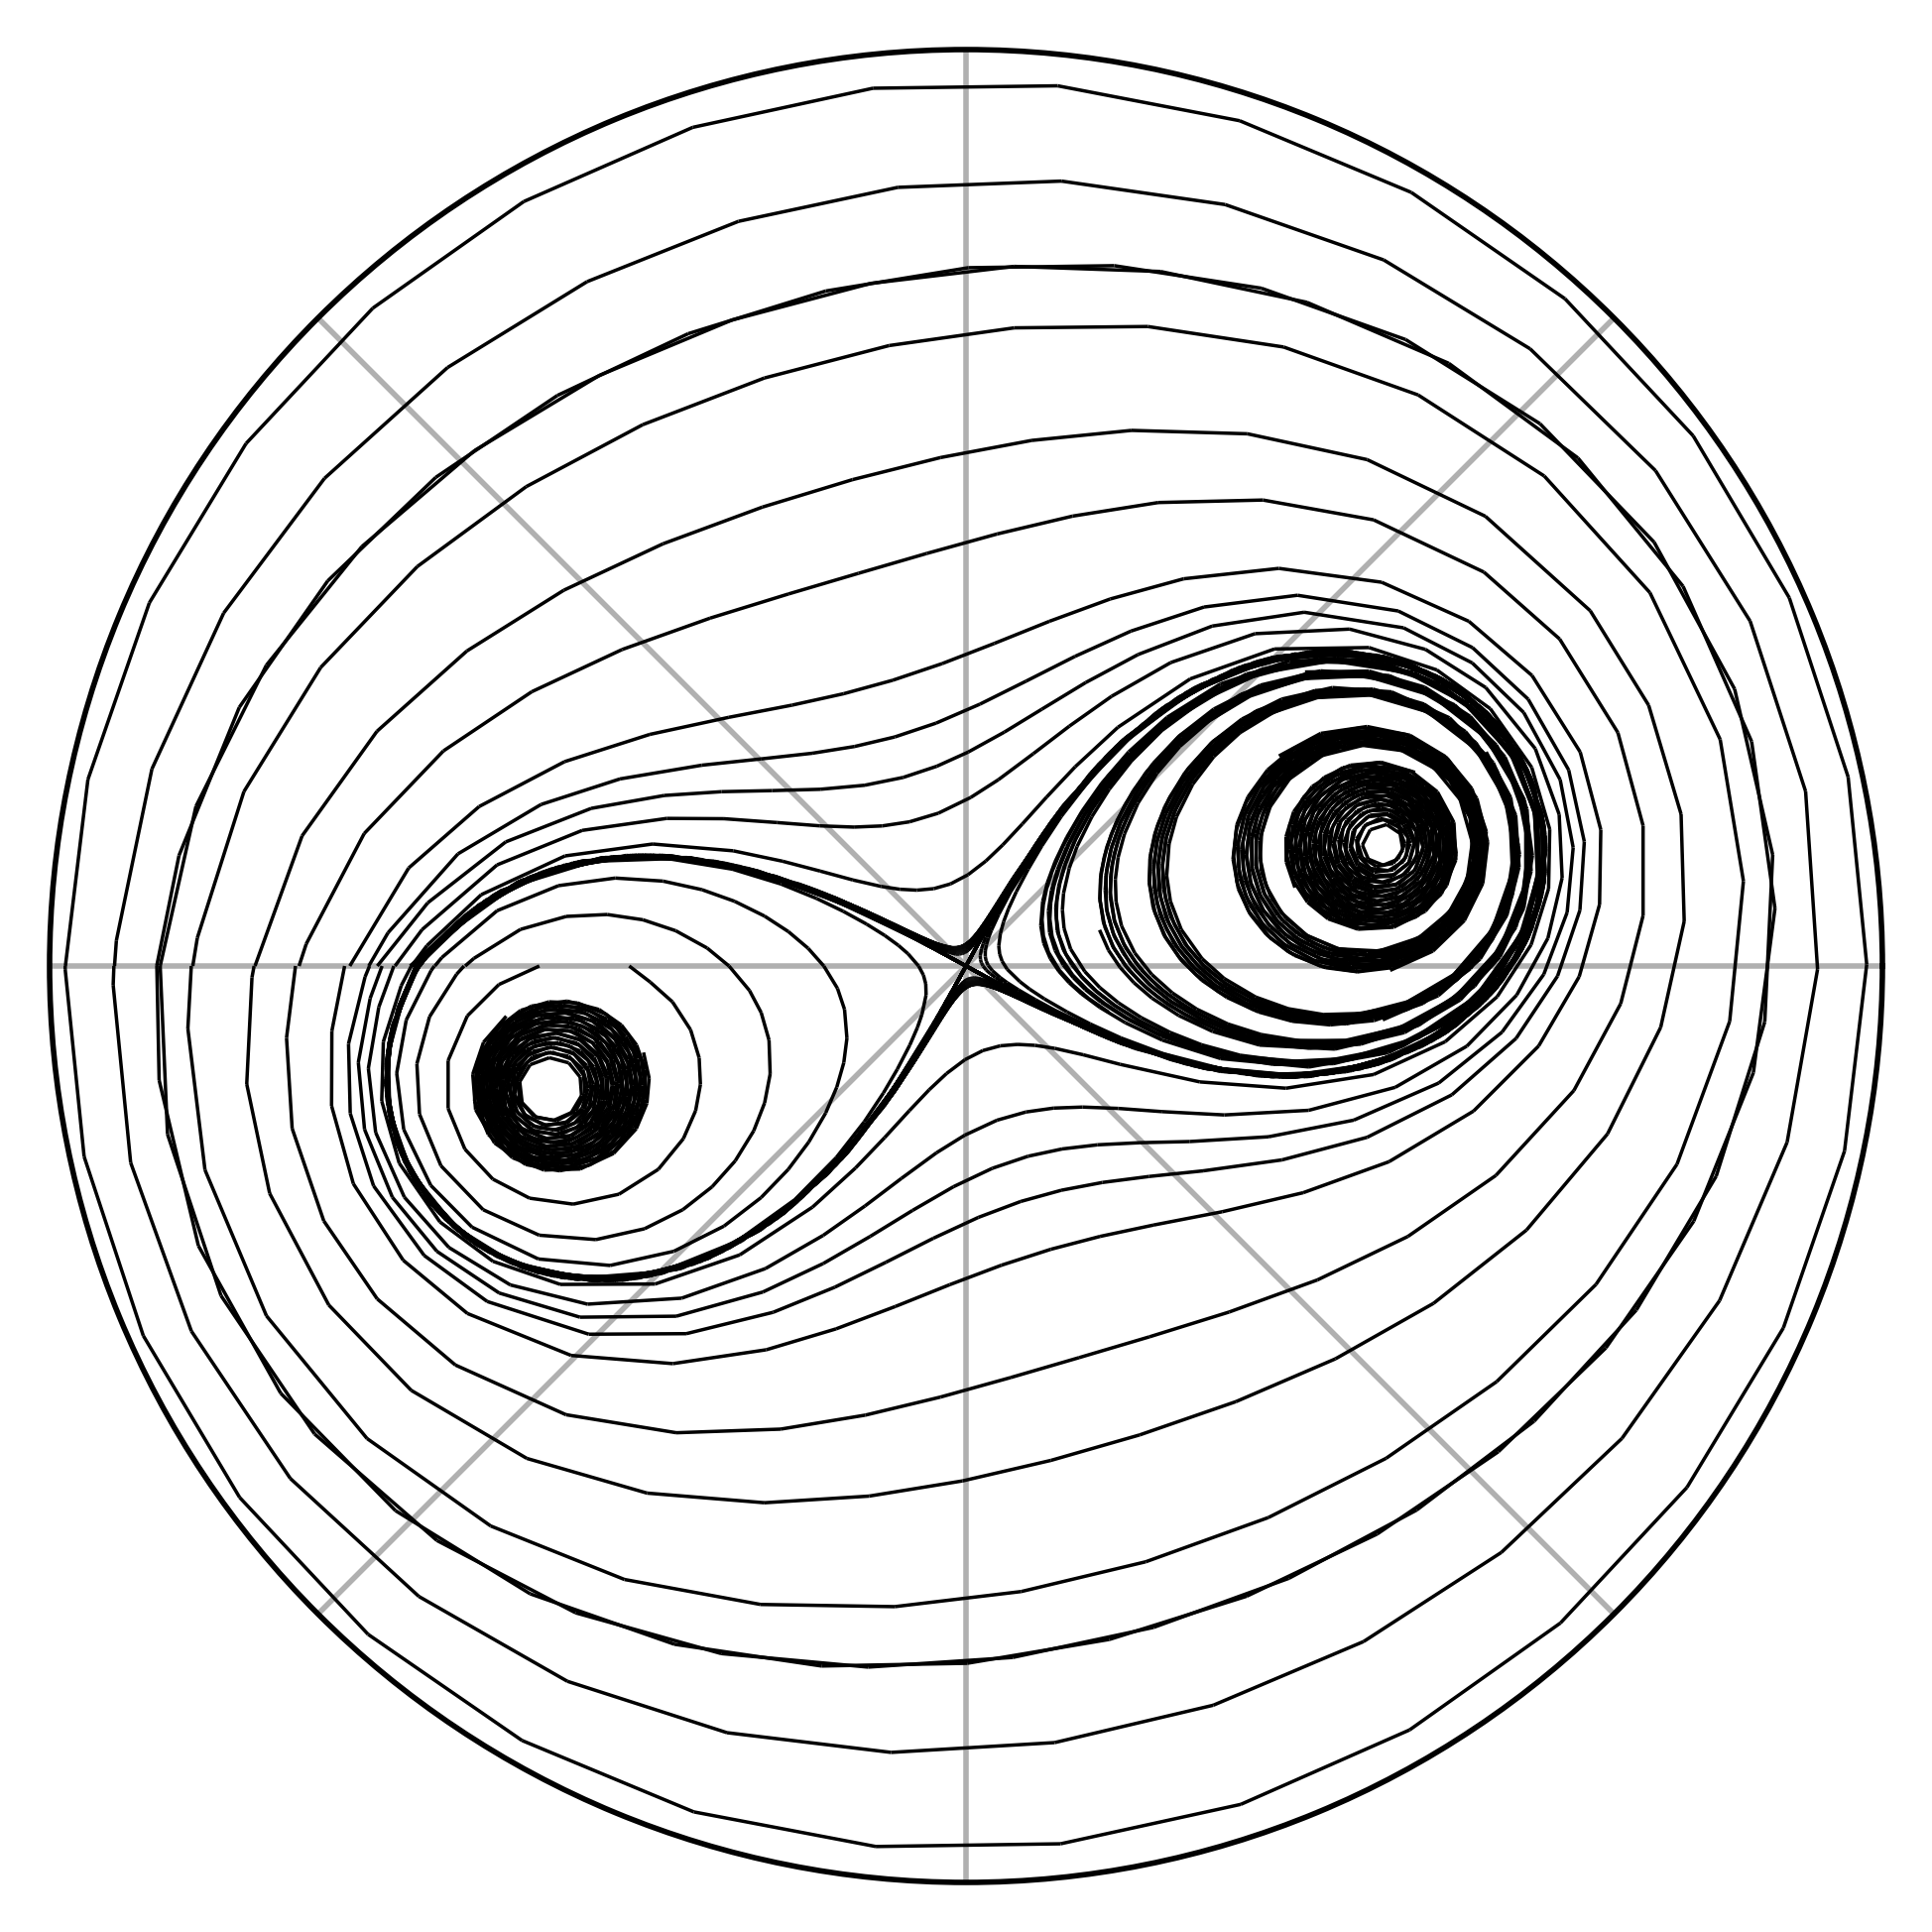

In [31]:

args = beta,alpha,eta1,eta2
t = np.arange(0,10000,0.1)
plt.figure(dpi=1000)


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},dpi=500)
plt.sca(ax)

u0s = [[np.sqrt(0.6),0]]

# plt.plot(phi,r)
xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
# plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')

x = np.linspace(-1.5,1.5,400)
y = np.linspace(-np.pi,np.pi,800)
X,Y = np.meshgrid(x,y)

U,V = myFun5([X,Y],0,args)
M = (np.hypot(U,V))

xs = np.linspace(-3,-1e-5,1000)

# plt.scatter(phiA,1,zorder=6,color='green',marker='x')
# plt.scatter(phiB,1,zorder=6,color='blue',marker='x')
# plt.scatter(phiA+np.pi,1,zorder=6,color='green',marker='x')
# plt.scatter(phiB+np.pi,1,zorder=6,color='blue',marker='x')

# plt.plot(A,RA,zorder=5,color='green',fillstyle='none',marker='x')
# plt.plot(B,RB,zorder=5,color='green',fillstyle='none',marker='x')

plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
plt.yticks([])
plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi,5*np.pi/4,6*np.pi/4,7*np.pi/4],['','','','','','','',''])


ax = plt.gca()
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.5,broken_streamlines=False,)
# ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])
# ax.axhline(1,color='RED')
# plt.scatter(*np.array(PHI_R).T,zorder=5,color='blue',marker='s',label='Fixed point');
# plt.legend(loc=3)

plt.tight_layout()
plt.show()

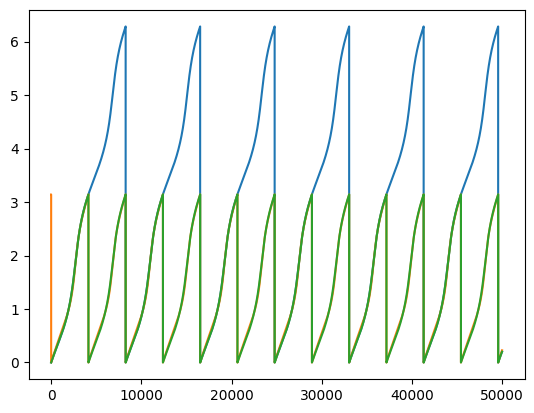

In [46]:
plt.plot((u[:,1])%(2*np.pi))

plt.plot((phi_s/2))
plt.plot((phi_s_reg/2))

In [32]:
phi_h = (phi_s/2)
phi_h_reg = (phi_s_reg/2)

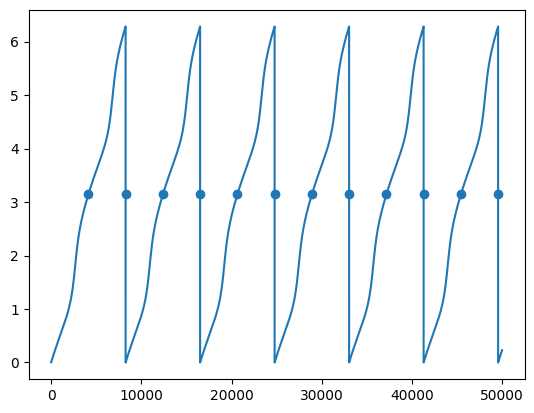

In [33]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(phi_h)
peak_values = phi_h[peaks]

result = phi_h.copy()
for i in range(0,len(peaks)-1,2):
    result[peaks[i]+1:peaks[i+1]] += np.pi

plt.plot(result)
plt.scatter(peaks,peak_values)

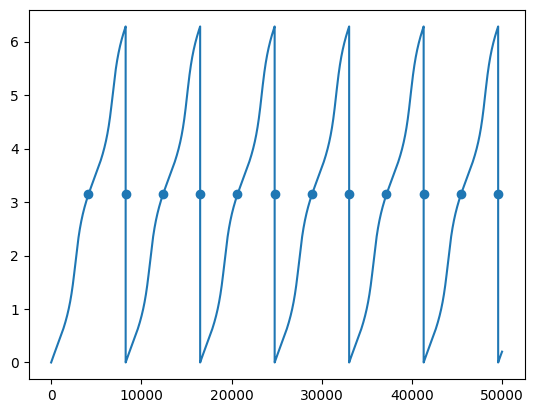

In [34]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(phi_h_reg)
peak_values = phi_h_reg[peaks]

result_reg = phi_h_reg.copy()
for i in range(0,len(peaks)-1,2):
    result_reg[peaks[i]+1:peaks[i+1]] += np.pi

plt.plot(result_reg)
plt.scatter(peaks,peak_values)

In [38]:
phi_s_2 = result
phi_s_reg_2 = result_reg

In [ ]:
MAX = np.max((phi_s/2))
np.where()

3.1415927

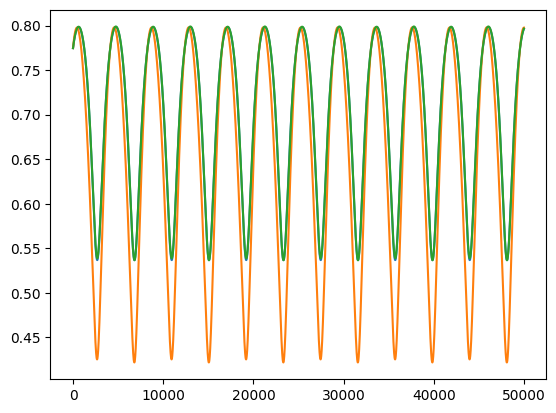

In [77]:
plt.plot(u[:,0])
plt.plot(np.sqrt(Q_s))
plt.plot(np.sqrt(Q_s_reg))

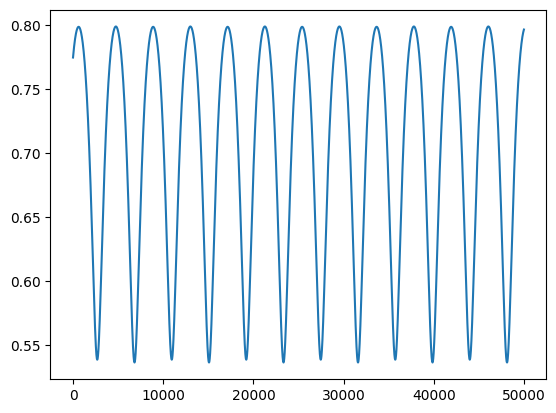

In [82]:
plt.plot(np.sqrt(Q_s_reg))

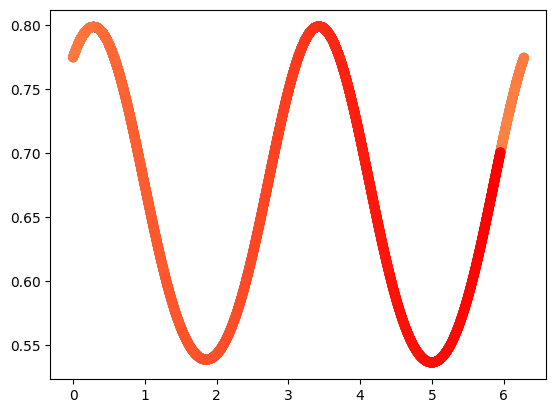

In [87]:
init_idx = 1000
plt.scatter(phi_s_reg_2[init_idx:-init_idx],np.sqrt(Q_s_reg[init_idx:-init_idx]),c= range(len(phi_s_reg_2[init_idx:-init_idx])),cmap='rainbow')

0.20262862987929964 0.7963162376495041


C:\Users\kim9y\AppData\Local\Temp\ipykernel_8540\3006020934.py:20: RuntimeWarning: divide by zero encountered in divide
  dr = 1/(2 * abs(r))* (1-abs(r)**4)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
C:\Users\kim9y\AppData\Local\Temp\ipykernel_8540\3006020934.py:21: RuntimeWarning: divide by zero encountered in divide
  dpsi2 = -1/(2*abs(r**2)) * (1+r**4)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))


<Figure size 6400x4800 with 0 Axes>

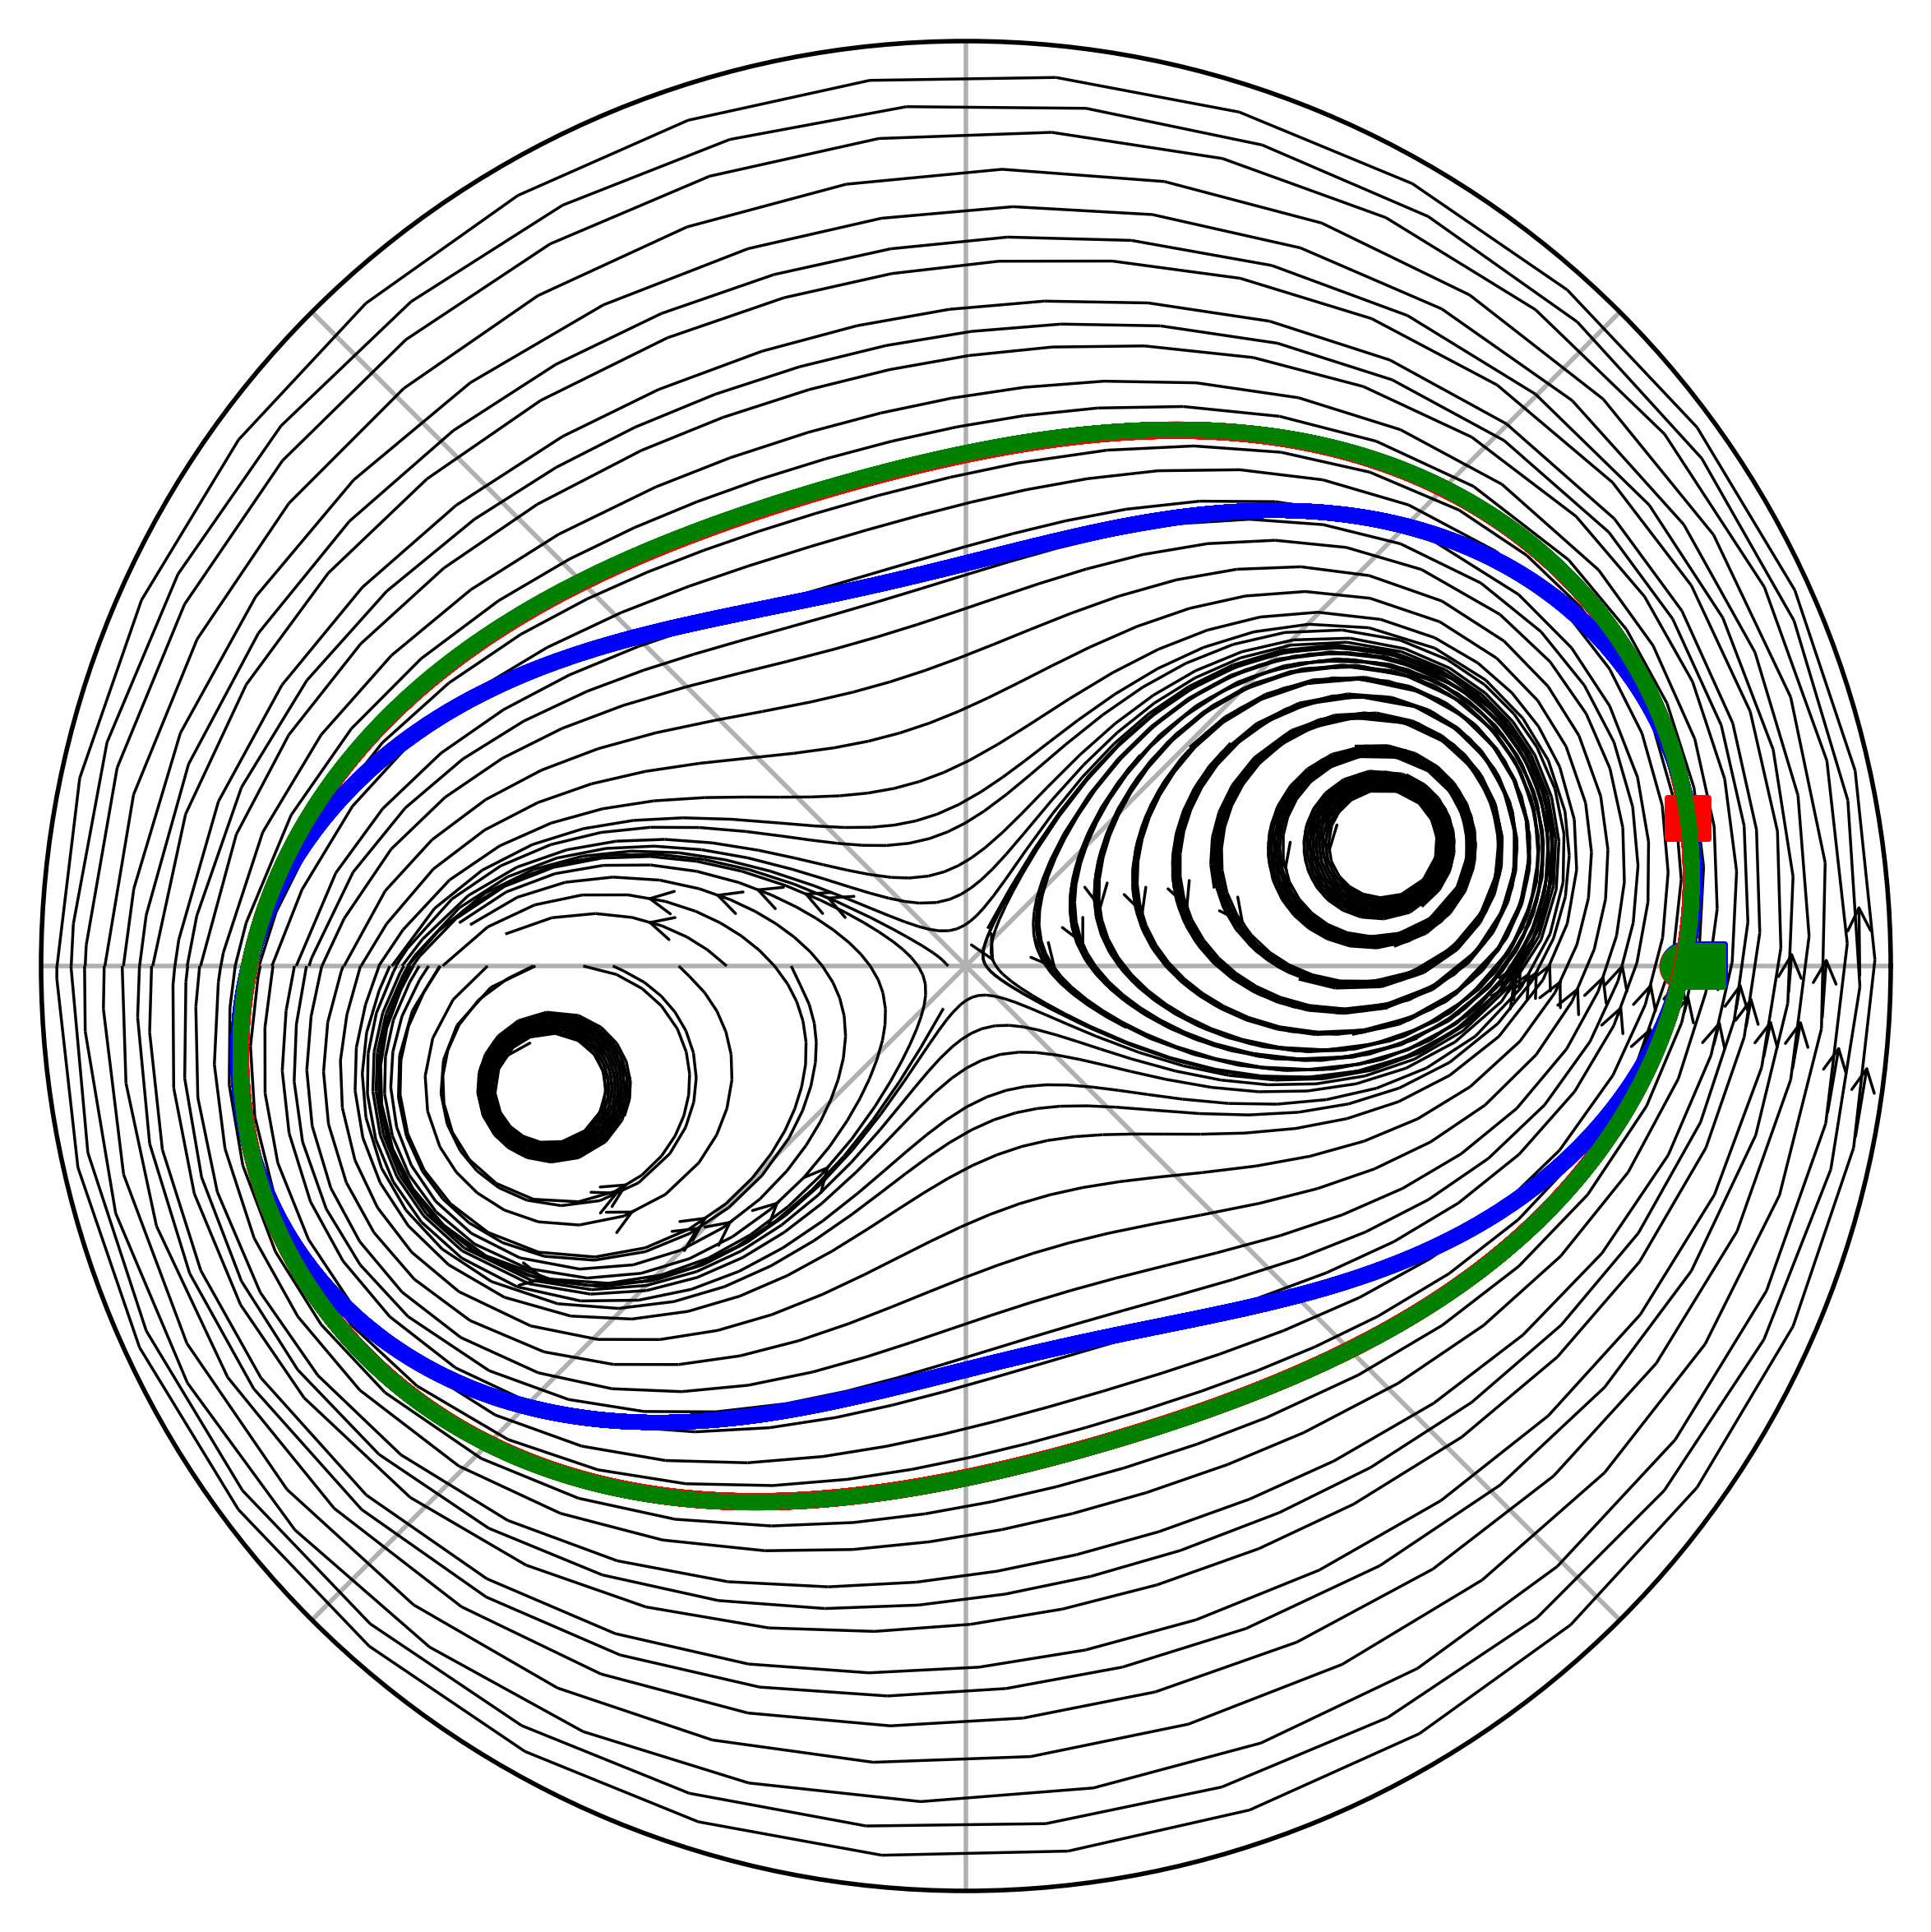

In [39]:

args = beta,alpha,eta1,eta2
t = np.arange(0,5000,0.1)
plt.figure(dpi=1000)


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},dpi=500)
plt.sca(ax)

u0s = [[np.sqrt(0.6),0]]
for i,u0 in enumerate(u0s):

	u = RK4(myFun4,np.array(u0,dtype=float),t,args=(args,))
	if i == 3:
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),zorder=5)
	else:	
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),color='red',zorder=5)
	plt.scatter(u[-1,1]%(np.pi*2),u[-1,0],s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot(u[:,1],u[:,0],lw=3,alpha=1,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	print(u[-1,1]%(np.pi*2),u[-1,0])

for i,u0 in enumerate(u0s):
	
	c=plt.scatter(phi_s_2[0],np.sqrt(Q_s[0]),s=50,zorder=5,color='blue')
	plt.scatter(phi_s_2[0],np.sqrt(Q_s[-1]),s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.scatter(phi_s_2[3:],np.sqrt(Q_s[3:]),s=3,alpha=1,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

for i,u0 in enumerate(u0s):
	
	c=plt.scatter(phi_s_reg_2[0],np.sqrt(Q_s_reg[0]),s=50,zorder=5,color='green')
	plt.scatter(phi_s_reg_2[0],np.sqrt(Q_s_reg[-1]),s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.scatter(phi_s_reg_2,np.sqrt(Q_s_reg),s=3,alpha=1,zorder=7,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))


xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
# plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')

x = np.linspace(0,1.5,400)
y = np.linspace(-np.pi,np.pi,800)
X,Y = np.meshgrid(x,y)

U,V = myFun5([X,Y],0,args)
M = (np.hypot(U,V))

xs = np.linspace(-3,-1e-5,1000)

plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
plt.yticks([])
plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi,5*np.pi/4,6*np.pi/4,7*np.pi/4],['','','','','','','',''])


ax = plt.gca()
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.5,broken_streamlines=False,)
# ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])
# ax.axhline(1,color='RED')
# plt.scatter(*np.array(PHI_R).T,zorder=5,color='blue',marker='s',label='Fixed point');
# plt.legend(loc=3)

plt.tight_layout()
plt.show()

C:\Users\kim9y\AppData\Local\Temp\ipykernel_24368\3006020934.py:20: RuntimeWarning: divide by zero encountered in divide
  dr = 1/(2 * abs(r))* (1-abs(r)**4)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
C:\Users\kim9y\AppData\Local\Temp\ipykernel_24368\3006020934.py:21: RuntimeWarning: divide by zero encountered in divide
  dpsi2 = -1/(2*abs(r**2)) * (1+r**4)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))


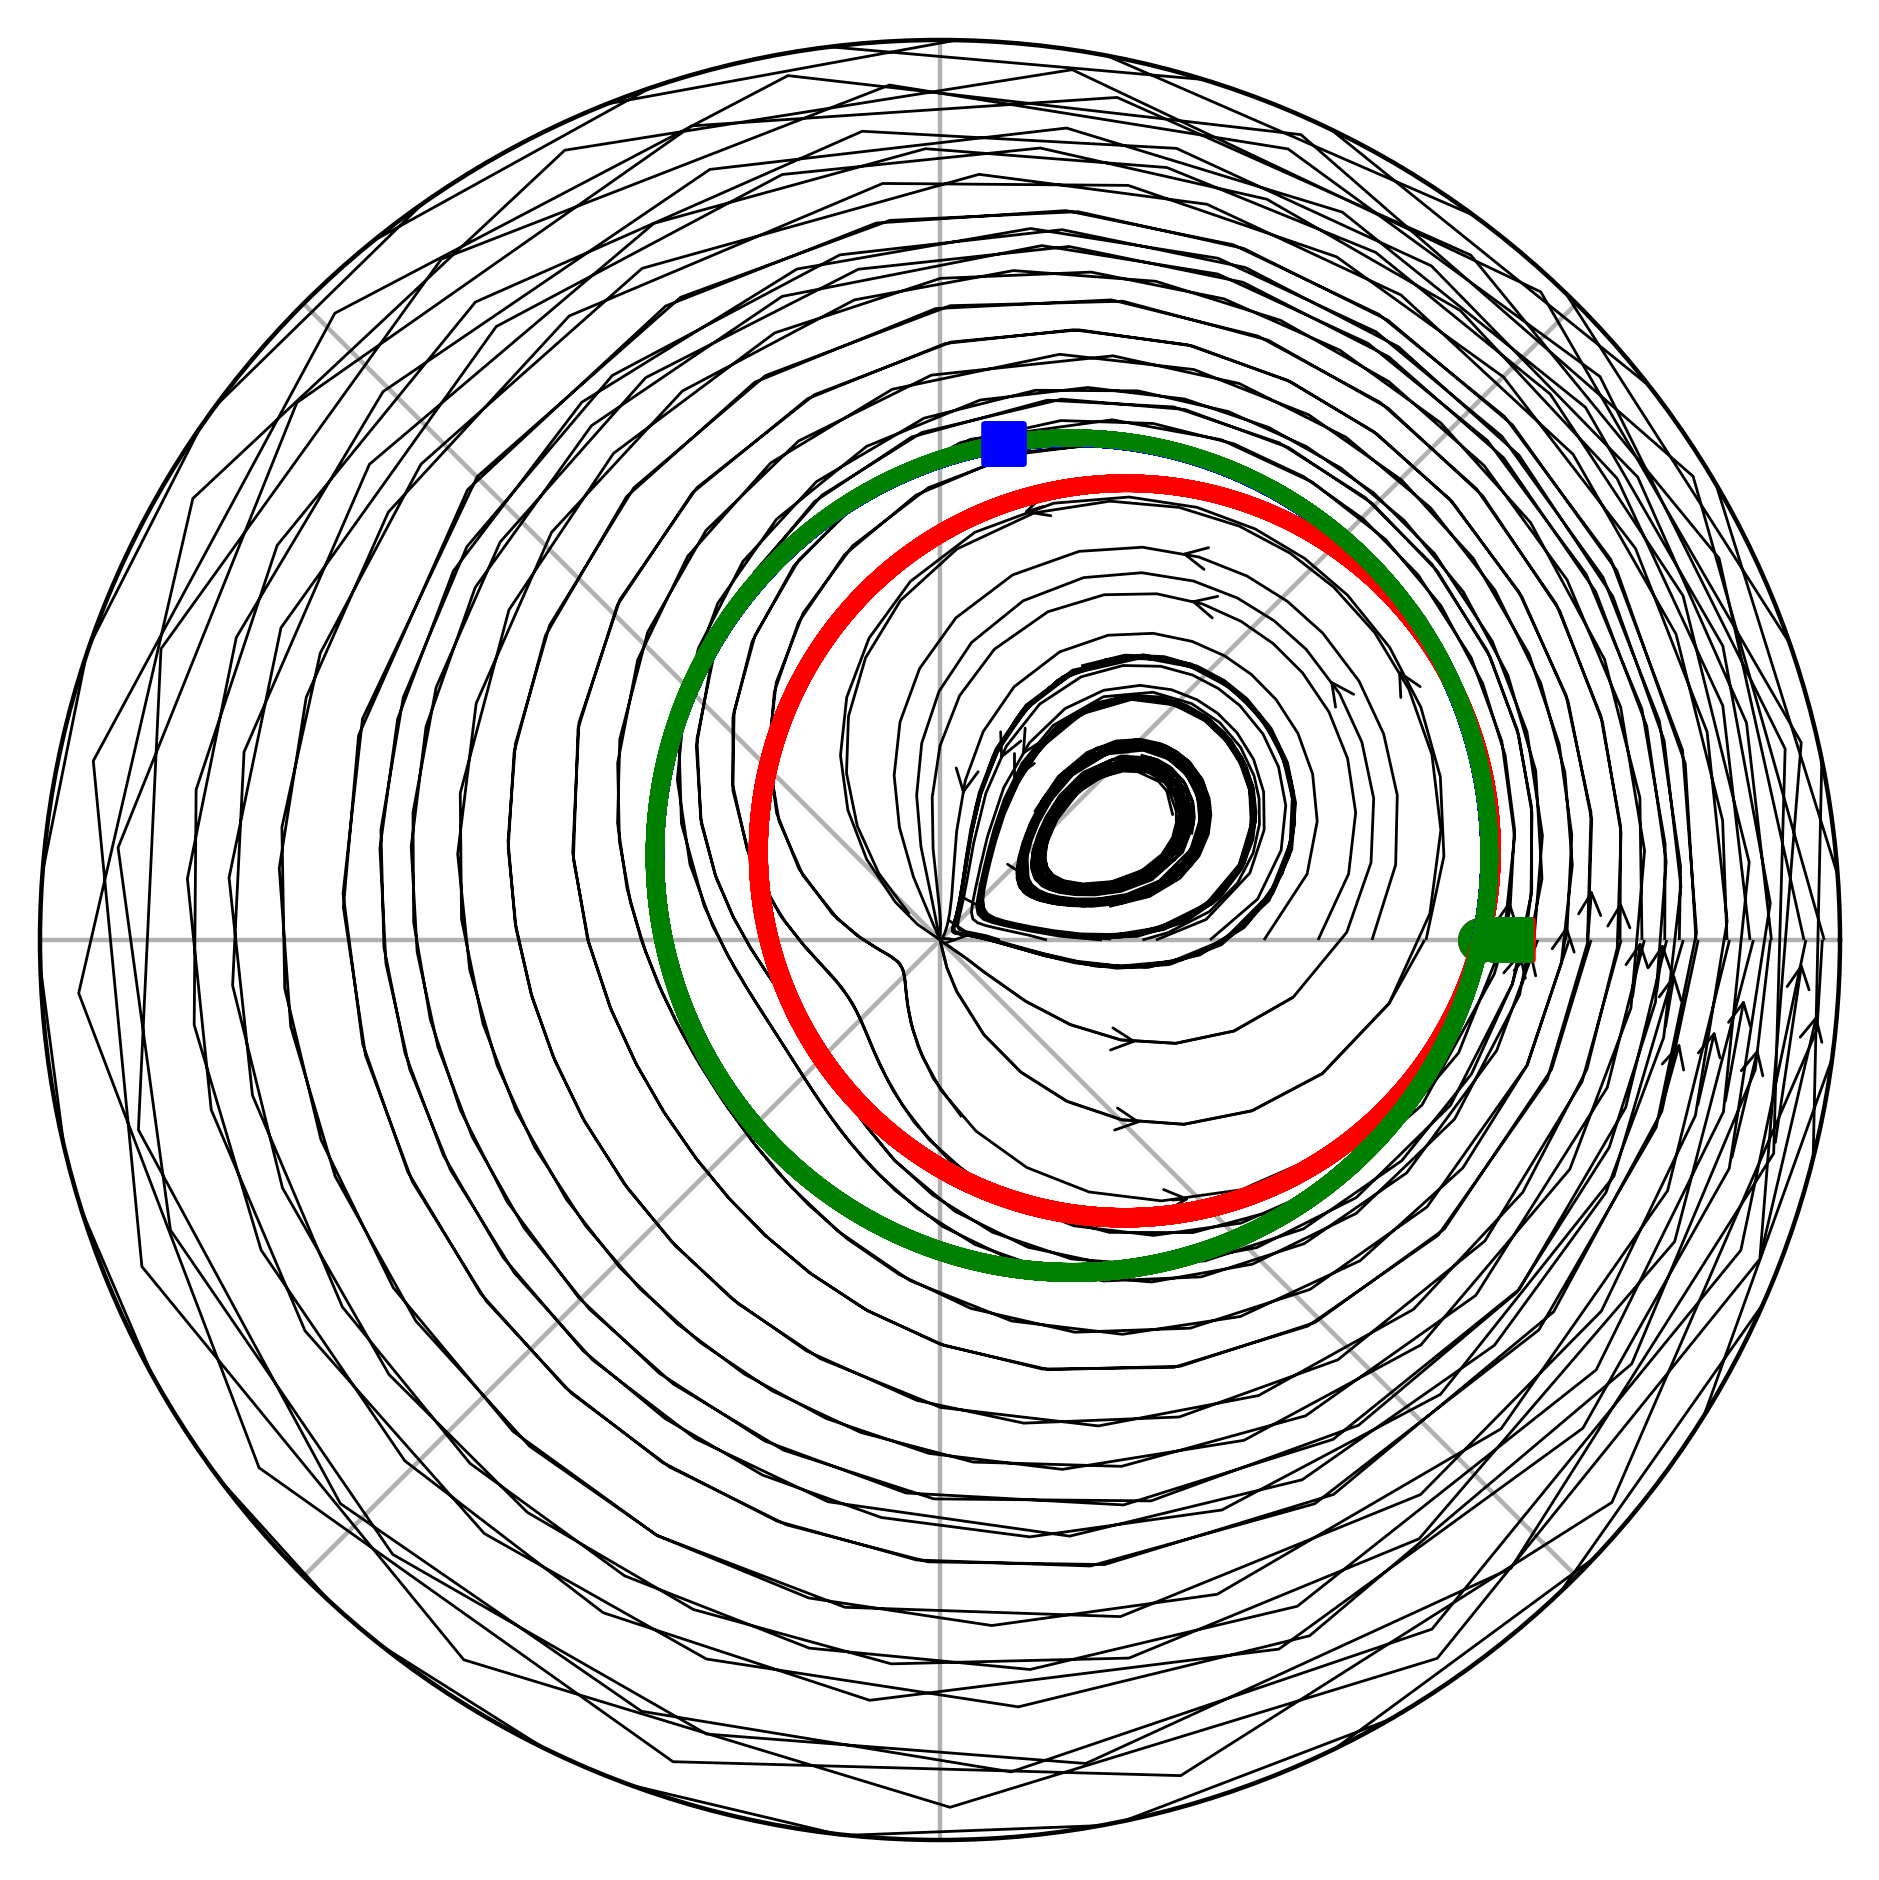

In [39]:
args = beta,alpha,eta1,eta2
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},dpi=400)


u0s = [[np.sqrt(0.6),0]]
for i,u0 in enumerate(u0s):
	u = RK4(myFun4,np.array(u0,dtype=float),t,args=(args,))
	c=plt.scatter((2*u[0,1]),u[0,0]**2,s=50,zorder=5,color='blue')
	plt.scatter((2*u[-1,1]),u[-1,0]**2,s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot((2*u[:,1])%(np.pi*2),u[:,0]**2,alpha=1,lw=3,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
x = np.linspace(0,1.2,6000)

u0s = [[np.sqrt(0.6),0]]
for i,u0 in enumerate(u0s):
	
	c=plt.scatter(phi_s[0],Q_s[0],s=50,zorder=5,color='red')
	plt.scatter(phi_s[0],Q_s[-1],s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot(phi_s,Q_s,alpha=1,lw=3,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

for i,u0 in enumerate(u0s):
	
	c=plt.scatter(phi_s_reg[0],Q_s_reg[0],s=50,zorder=5,color='green')
	plt.scatter(phi_s_reg[0],Q_s_reg[-1],s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot(phi_s_reg,Q_s_reg,alpha=1,lw=3,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
x = np.linspace(0,1.2,6000)
x = np.sqrt(x)

y = np.linspace(-np.pi,np.pi,4000)

X,Y = np.meshgrid(x,y)

U,V = myFun5([X,Y],0,args)
M = (np.hypot(U,V))

# plt.sca(ax)
ax = plt.gca()
plt.ylim(0,1.0)
plt.yticks([])
plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi,5*np.pi/4,6*np.pi/4,7*np.pi/4],['','','','','','','',''])




plt.xlim(0,2*np.pi)
ax.streamplot((2*Y).T,(X**2).T,V.T,U.T,zorder=3,density=0.7,arrowstyle='->',color='k',linewidth=0.5,broken_streamlines=False,)
# plt.title(rf'$\alpha={alpha},\beta={beta}$')
# plt.title(rf'$\alpha={alpha}$',fontsize=20)
# plt.title(rf'$\beta={beta}$',fontsize=20)
plt.tight_layout()
plt.show()